# Timer ipywidget using threads

based on https://github.com/sclamons/murraylab_tools/blob/c633ed08abc189b5f18cfbc5288359f267a2487a/murraylab_tools/protocol/protocol.py
and
https://github.com/sclamons/murraylab_tools/blob/c633ed08abc189b5f18cfbc5288359f267a2487a/examples/protocols.ipynb
found by searching 'import ipywidgets as widgets threading .stop' at github.
And then when I found `protocol.py` I searched `Timer` in that repo to find the notebook



This notebook works in Binder sessions launched from [this jupyter-jsmol repo](https://github.com/fekad/jupyter-jsmol).
launch url: https://mybinder.org/v2/gh/fekad/jupyter-jsmol/master?filepath=examples

--------

Code to illustrate concepts from [here](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Asynchronous.html#Updating-a-widget-in-the-background) in relation to a Jupyter discourse question [here](https://discourse.jupyter.org/t/keyboardinterrupt-button-in-voila/7405).

Also considered:
https://github.com/kjoelovelife/Jetson_nano/blob/e7d2fb6a6db02ba041197768996d066268f22b0a/jetson-dlinano/NVIDIA%20Course/5.%20Thumbs%20Project.md

In [9]:
import ipywidgets as widgets
from IPython.display import display, Javascript
from traitlets import Unicode, validate
import time
import threading

class Timer():

    def __init__(self,limit=180):
        #self.value = Unicode('00:00:00').tag(sync=True)
        self.labwidg = widgets.Button(description="00:00:00",layout=lay(120,50))
        self.labwidg.on_click(self.threadTimer)
       
        self.limit = limit
        self.stopTimer = False
        self.thread = None
        self.buttonState = "Start"
    def timeit(self, limit=180):
        #display(self)
        hours = 0
        mins = 0
        secs = 0
        for i in range(1,(limit*60+1)):
            if(self.buttonState == "Start"):
                self.labwidg.button_style="primary"
                #self.labwidg.style.font_weight = "50px"
            elif(self.buttonState == "Stop"):
                self.labwidg.button_style="success"
                #self.labwidg.style.font_weight = "50px"
            elif(self.buttonState == "Reset"):
                self.labwidg.button_style="warning"
                #self.labwidg.style.font_weight = "50px"
            if(self.stopTimer):
                self.stopTimer = False
                self.thread = None
                break
            if i%60 == 0:
                if i%3600 == 0:
                    secs = 0
                    mins = 0
                    hours += 1
                else:
                    secs = 0
                    mins += 1
            else:
                secs += 1
            time.sleep(.0167)
            self.labwidg.description = '{hour:02}:{minute:02}:{second:02}'.\
                            format(hour=hours,minute=mins,second=secs)
    #def twrap(self,b,limit=180):
    #    self.timeit(limit=limit)
    def threadTimer(self,b):
        #b.description = self.buttonState
        if(self.buttonState == "Start"):
            if(self.thread == None):
                self.thread = threading.Thread(target=self.timeit,args=(self.limit,))
                self.thread.start()
                self.buttonState = "Stop"
        elif(self.buttonState == "Stop"):
            if(self.thread != None):
                self.stopTimer=True
                self.buttonState = "Reset"
        else:
            self.labwidg.description = '00:00:00'
            self.Thread = None
            self.stopTimer=False
            self.buttonState = "Start"
    def stopTime(self,b):
        self.stopTimer=True

#def startTimer(b,timer):
    #, args=(,))
def lay(width,height):
    return widgets.Layout(width=str(width)+"px",height=str(height)+"px")
def display_timer():
    timer = Timer()
    display(timer.labwidg)

In [10]:
display_timer()

Button(description='00:00:00', layout=Layout(height='50px', width='120px'), style=ButtonStyle())

In [33]:
from IPython.display import display,Markdown,HTML
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from IPython.display import display, clear_output

In [34]:
out = widgets.Output()
laufbutton= widgets.Button(
            description='lauf ',
            disabled=False,
            button_style='success',
            tooltip='',
            icon='',
            layout=widgets.Layout(width='50%',height ='inherit'))

haltbutton=widgets.Button(
            description='halt ',
            disabled=False,
            button_style='danger',
            tooltip='',
            
            layout=widgets.Layout(width='50%',height ='inherit'))


In [35]:


class sth:
        
    stopped = False
    thread = None
    buttonState = "Start"
        
        
    def thread_func(self,something, out):
        for i in range(1, 30):
            
                        
            time.sleep(0.2)
            #out.append_stdout('{} {} {}\n'.format(i, '**'*i, something))
            if(self.buttonState == "Stop"):
                        
                        out.append_display_data(HTML("<em>Stopped!</em>"))
                        break;
            with out:
                    clear_output()
                    fig = plt.figure()
                    ax = plt.axes()
                    ax.plot(i);
                    
        out.append_display_data(HTML("<em>All done!</em>"))

    
    

In [36]:
s_obj=sth()

In [37]:
def start_thread(b):
        thread = threading.Thread(
            target=s_obj.thread_func,
            args=("some text", out))
        thread.start()
        
    
def stop_thread(b):
    s_obj.stopped=True
    s_obj.buttonState="Stop"
    

In [38]:

laufbutton.on_click(start_thread)
haltbutton.on_click(stop_thread)



Button(button_style='success', description='lauf ', layout=Layout(height='inherit', width='50%'), style=Button…

Button(button_style='danger', description='halt ', layout=Layout(height='inherit', width='50%'), style=ButtonS…

Output()

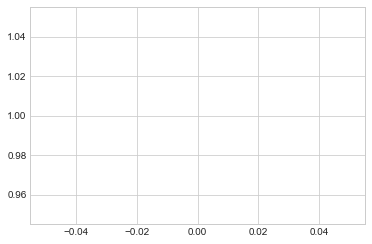

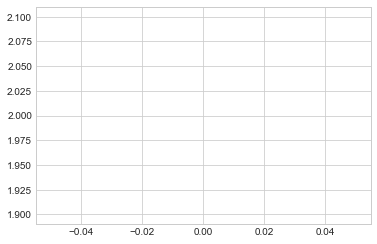

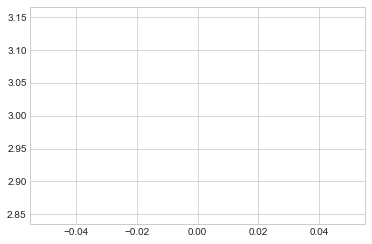

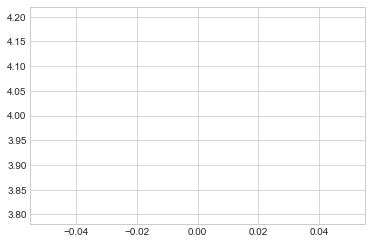

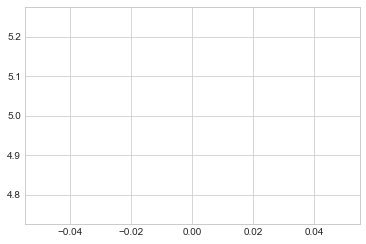

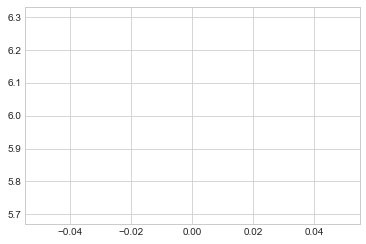

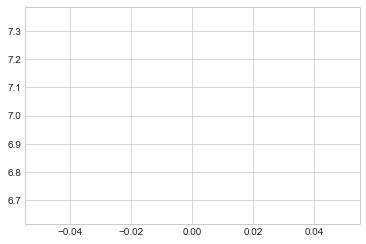

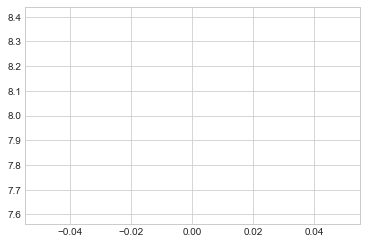

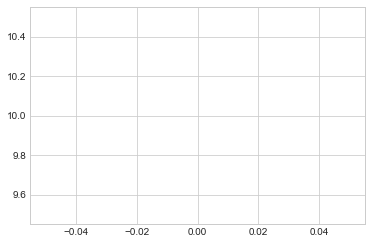

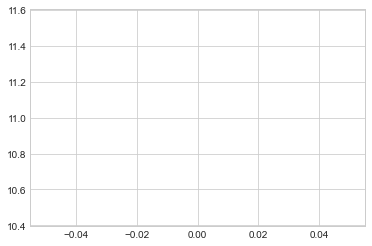

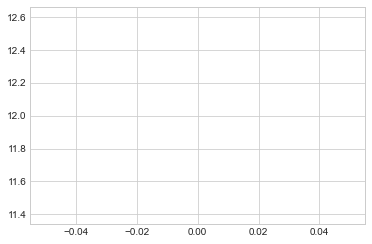

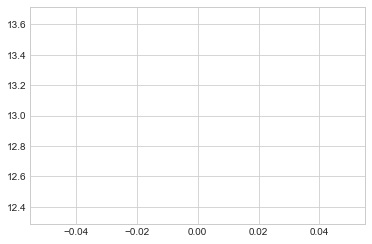

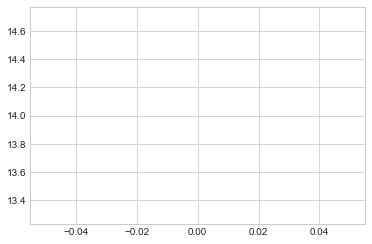

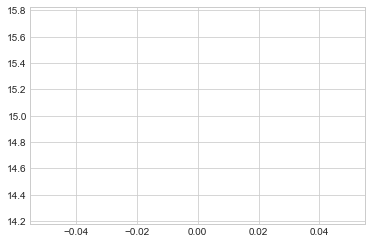

In [39]:
display(laufbutton,haltbutton,out)



